In [1]:
import os
import sys; sys.path.append("~/HHbbgg_ETH/Training/python") # to load packages
import training_utils as utils
reload(utils)

Welcome to ROOTaaS 6.06/05


<module 'training_utils' from '/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/Training/python/training_utils.pyc'>

In [2]:
ntuples = '20170509'
# "%" sign allows to interpret the rest as a system command
print utils.IO.ldata
%env data=$utils.IO.ldata$ntuples
files = ! ls $data | sort -t_ -k 3 -n
signal = [s for s in files if "NonRes" in s]
signalName=utils.IO.ldata+ntuples+"/"+''.join(signal)
print "using signal file:"+signalName
background = [s for s in files if "DiPhotonJets" in s]
backgroundName=utils.IO.ldata+ntuples+"/"+''.join(background)
print "using background file:"+backgroundName

/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/
env: data=/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170509
using signal file:/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170509/AllNonResSig.root
using background file:/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170509/output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa.root


In [3]:
import numpy as np

In [22]:
#normal variables: int, float, vectors...
branch_names = 'npu,genTotalWeight'.split(",")
branch_names = [c.strip() for c in branch_names]
branch_names = (b.replace(" ", "_") for b in branch_names)
branch_names = list(b.replace("-", "_") for b in branch_names)

#tlorentz vectors
branch_names_lorentz = 'leadingJet,leadingPhoton'.split(",")
branch_names_lorentz = [c.strip() for c in branch_names_lorentz]
branch_names_lorentz = (b.replace(" ", "_") for b in branch_names_lorentz)
branch_names_lorentz = list(b.replace("-", "_") for b in branch_names_lorentz)
print branch_names_lorentz

#variables we want to access in tlorenz vector
branch_names_lorentz_var = 'Pt(),Eta()'.split(",")
branch_names_lorentz_var = [c.strip() for c in branch_names_lorentz_var]
branch_names_lorentz_var = (b.replace(" ", "_") for b in branch_names_lorentz_var)
branch_names_lorentz_var = list(b.replace("-", "_") for b in branch_names_lorentz_var)
print branch_names_lorentz_var

['leadingJet', 'leadingPhoton']
['Pt()', 'Eta()']


In [23]:
import pandas as pd
import root_pandas as rpd
reload(rpd)

# doesn't work the alias bbggSelectionTree.SetAlias("leadingJetPt","leadingJet.Pt()")
#signal_df = rpd.read_root("prova.root","daje", columns = branch_names) 

#this is my modified version of root_pandas library
signal_df = rpd.read_root_LorentzVector(signalName,"bbggSelectionTree", columns = branch_names, columns_lorentz=branch_names_lorentz,columns_lorentz_var=branch_names_\
lorentz_var)
import numpy as np
signal_df.to_csv('/tmp/micheli/prova.csv',',',mode='w')


#signal_df = pd.root2array(signalName, "bbggSelectionTree", branch_names)

leadingJet
leadingJet
leadingPhoton
leadingPhoton
['genWeights', 'genTotalWeight', 'gen_mHH', 'gen_cosTheta', 'gen_NRW', 'leadingPhoton', 'leadingPhotonID', 'leadingPhotonISO', 'leadingPhotonEVeto', 'leadingPhotonIDMVA', 'customLeadingPhotonIDMVA', 'leadingPhotonR9full5x5', 'leadingPhotonHasGain1', 'leadingPhotonHasGain6', 'subleadingPhoton', 'subleadingPhotonID', 'subleadingPhotonISO', 'subleadingPhotonEVeto', 'subleadingPhotonIDMVA', 'customSubLeadingPhotonMVA', 'subleadingPhotonR9full5x5', 'subLeadingPhotonHasGain1', 'subLeadingPhotonHasGain6', 'diphotonCandidate', 'nPromptInDiPhoton', 'leadingJet', 'leadingJet_KF', 'leadingJet_Reg', 'leadingJet_RegKF', 'leadingJet_bDis', 'leadingJet_CSVv2', 'leadingJet_cMVA', 'leadingJet_flavour', 'leadingJet_hadFlavour', 'subleadingJet', 'subleadingJet_KF', 'subleadingJet_Reg', 'subleadingJet_RegKF', 'subleadingJet_bDis', 'subleadingJet_CSVv2', 'subleadingJet_cMVA', 'subleadingJet_flavour', 'subleadingJet_hadFlavour', 'dijetCandidate', 'dijetCandi

In [24]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier(max_depth=5,learning_rate=0.2,n_estimators=100,min_weight_fraction_leaf=1e-4)

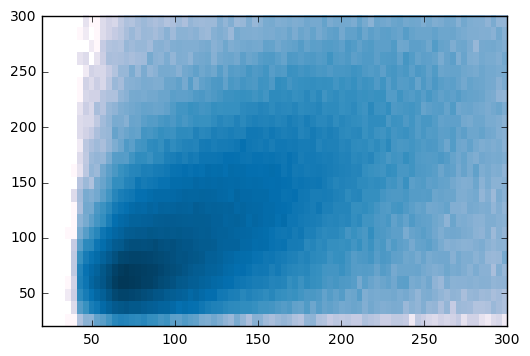

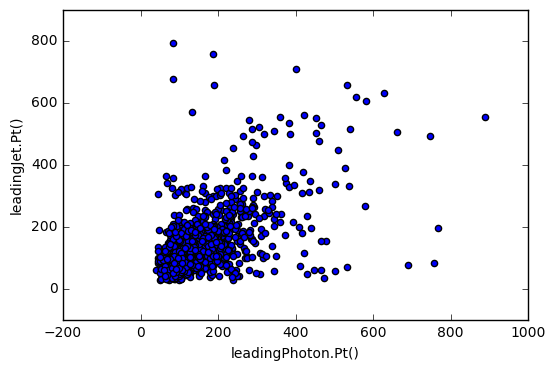

(array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ..., 
        [  4.,  20.,  15., ...,  40.,  27.,  35.],
        [  5.,  16.,  17., ...,  36.,  40.,  23.],
        [  2.,  13.,  13., ...,  30.,  28.,  22.]]),
 array([  20. ,   23.5,   27. ,   30.5,   34. ,   37.5,   41. ,   44.5,
          48. ,   51.5,   55. ,   58.5,   62. ,   65.5,   69. ,   72.5,
          76. ,   79.5,   83. ,   86.5,   90. ,   93.5,   97. ,  100.5,
         104. ,  107.5,  111. ,  114.5,  118. ,  121.5,  125. ,  128.5,
         132. ,  135.5,  139. ,  142.5,  146. ,  149.5,  153. ,  156.5,
         160. ,  163.5,  167. ,  170.5,  174. ,  177.5,  181. ,  184.5,
         188. ,  191.5,  195. ,  198.5,  202. ,  205.5,  209. ,  212.5,
         216. ,  219.5,  223. ,  226.5,  230. ,  233.5,  237. ,  240.5,
         244. ,  247.5,  251. ,  254.5,  258. ,  261.5,  265. ,  268.5,
         272. ,  275.5,  279. 

In [63]:
import random
import matplotlib.pyplot as plt
#plot 1000 data points at random
signal_df.ix[random.sample(signal_df.index, 1000)].plot(kind='scatter',
                                          x='leadingPhoton.Pt()', y='leadingJet.Pt()')
plt.show()
from matplotlib.colors import LogNorm
plt.hist2d(x=signal_df['leadingPhoton.Pt()'],y=signal_df['leadingJet.Pt()'],
            range=[[20,300],[20,300]],bins=[80,25],norm=LogNorm(),cmap='PuBu')

In [57]:
X = signal_df[['leadingJet.Pt()', 'leadingJet.Eta()', 'leadingPhoton.Pt()', 'leadingPhoton.Eta()']]
Y = signal_df[['npu']] 
W = signal_df[['genTotalWeight']]
clf.fit(Y,X,W)

ValueError: bad input shape (305578, 4)